In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
## Install flair library
!pip install flair

     |████████████████████████████████| 322 kB 33.9 MB/s 
     |████████████████████████████████| 19.7 MB 1.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 48 kB 4.5 MB/s 
     |████████████████████████████████| 59 kB 5.8 MB/s 
     |████████████████████████████████| 64 kB 2.6 MB/s 
     |████████████████████████████████| 3.1 MB 35.4 MB/s 
     |████████████████████████████████| 981 kB 37.7 MB/s 
     |████████████████████████████████| 1.2 MB 46.9 MB/s 
     |████████████████████████████████| 788 kB 48.3 MB/s 
     |████████████████████████████████| 62 kB 760 kB/s 
     |████████████████████████████████| 596 kB 44.7 MB/s 
     |████████████████████████████████| 895 kB 54.4 MB/s 
     |████████████████████████████████| 3.3 MB 45.6 MB/s 
  Created wheel for gdown: filename=gdown-3.12.2-py3-none-any.whl size=9704 sha256=42e82102a477dfbd98e01466522baacc4838fc37baf0b

In [3]:
!pip install allennlp

     |████████████████████████████████| 738 kB 31.7 MB/s 
     |████████████████████████████████| 124 kB 53.8 MB/s 
     |████████████████████████████████| 259 kB 68.2 MB/s 
     |████████████████████████████████| 1.7 MB 47.5 MB/s 
     |████████████████████████████████| 290 kB 45.9 MB/s 
     |████████████████████████████████| 190 kB 68.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 12.1 MB 44.0 MB/s 
     |████████████████████████████████| 22.3 MB 45.4 MB/s 
     |████████████████████████████████| 167 kB 47.6 MB/s 
     |████████████████████████████████| 131 kB 51.6 MB/s 
     |████████████████████████████████| 8.2 MB 21.7 MB/s 
     |████████████████████████████████| 79 kB 6.2 MB/s 
     |████████████████████████████████| 138 kB 68.8 MB/s 
     |████████████████████████████████| 1.1 MB 33.9 MB/s 
     |█████████████

In [4]:
!python -m spacy download en_core_web_md

     |████████████████████████████████| 96.4 MB 1.2 MB/s 
  Created wheel for en-core-web-md: filename=en_core_web_md-2.2.5-py3-none-any.whl size=98051302 sha256=f9a1a0903dbbcd466b08b359b0a3c512f625cd0ac8e537c5e5303a2ad09f0501
  Stored in directory: /tmp/pip-ephem-wheel-cache-_7gdg7ay/wheels/69/c5/b8/4f1c029d89238734311b3269762ab2ee325a42da2ce8edb997
Successfully built en-core-web-md
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [5]:
## Load Spacy Utilities:
import spacy
import en_core_web_md
nlp = en_core_web_md.load()


In [6]:
## Flair Utilities
from flair.embeddings import ELMoEmbeddings, PooledFlairEmbeddings, DocumentPoolEmbeddings
from typing import List
from flair.data import Sentence

In [7]:
from nltk.parse import load_parser
import tensorflow as tf
import pandas as pd
import numpy as np
import sys
import time
import textwrap
import re
import attr
import abc
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import HTML
from os import listdir
from os.path import isfile, join
from transformers import AutoTokenizer, TFAutoModelForQuestionAnswering


In [8]:
df = pd.read_csv("/content/drive/MyDrive/CSC494_NLP/Bibliometrix-melioidosis-2021-11-23.csv")
df.head(-10)

,AU,AF,DE,AID,OT,PHST,DT,AB,C1,OI,BTI,CI,CIN,CN,COIS,CON,CP,CRDT,CRF,CRI,CTDT,DCOM,DEP,PY,ED,EDAT,EFR,EIN,EN,FED,FIR,FPS,GN,GR,IS,IR,IRAD,SN,ISBN,JID,...,MHDA,MID,OAB,OABL,OID,OTO,OWN,PB,PP,PL,PMC,PMCR,PMID,PS,PST,RF,RIN,RN,ROF,SB,SI,SO2,STAT,J9,TI,TT,UIN,UOF,VL,DI,DB,ID,RP,TC,CR,AU_UN,AU1_UN,AU_UN_NR,SR_FULL,SR
0,CHAKRAVORTY A;HEATH CH,"CHAKRAVORTY, ARINDAM;HEATH, CHRISTOPHER",ADULT;ANTI-BACTERIAL AGENTS/THERAPEUTIC USE;AU...,10.31128/AJGP-04-18-4558 [DOI],NaN,2019/05/28 06:00 [ENTREZ];2019/05/28 06:00 [PU...,JOURNAL ARTICLE;REVIEW,BACKGROUND: ENDEMIC TO SOILS OF NORTHERN AUSTR...,"MBBS, FRACP, DEPARTMENT OF MICROBIOLOGY AND IN...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019/05/28 06:00,NaN,NaN,NaN,20200616.0,NaN,2019,NaN,2019/05/28 06:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,2208-7958 (ELECTRONIC),NaN,101718099,...,2020/06/17 06:00,NaN,NaN,NaN,NaN,NaN,NLM,NaN,327-332,AUSTRALIA,NaN,NaN,31129946,NaN,PPUBLISH,NaN,NaN,0 (ANTI-BACTERIAL AGENTS),NaN,IM,NaN,AUST J GEN PRACT. 2019 MAY;48(5):327-332. DOI:...,MEDLINE,AUST J GEN PRACT,MELIOIDOSIS: AN UPDATED REVIEW.,NaN,NaN,NaN,48,10.31128/AJGP-04-18-4558,PUBMED,ADULT;ANTI-BACTERIAL AGENTS/THERAPEUTIC USE;AU...,NaN,0,none,ROYAL PERTH HOSPITAL;CHAKRAVORTY@HEALTH.;ROYAL...,ROYAL PERTH HOSPITAL;NOTREPORTED;CHAKRAVORTY@H...,NaN,"CHAKRAVORTY A, 2019, AUST J GEN PRACT","CHAKRAVORTY A, 2019, AUST J GEN PRACT"
1,VIRK HS;MUKHOPADHYAY C;WIERSINGA WJ,"VIRK, HARJEET SINGH;MUKHOPADHYAY, CHIRANJAY;WI...",ANTI-BACTERIAL AGENTS/THERAPEUTIC USE;BURKHOLD...,10.1055/S-0040-1710570 [DOI],NaN,2020/07/07 06:00 [ENTREZ];2020/07/07 06:00 [PU...,JOURNAL ARTICLE;REVIEW,"MELIOIDOSIS, CAUSED BY THE FACULTATIVE INTRACE...",CENTER FOR EXPERIMENTAL AND MOLECULAR MEDICINE...,NaN,NaN,"THIEME MEDICAL PUBLISHERS 333 SEVENTH AVENUE, ...",NaN,NaN,NONE DECLARED.,NaN,NaN,2020/07/07 06:00,NaN,NaN,NaN,20210712.0,20200706.0,2020,NaN,2020/07/07 06:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NETHERLANDS ORGANIZATION FOR SCIENTIFIC RESEAR...,4,NaN,NaN,1098-9048 (ELECTRONIC) 1069-3424 (LINKING),NaN,9431858,...,2021/07/13 06:00,NaN,NaN,NaN,NaN,NaN,NLM,NaN,496-508,UNITED STATES,NaN,NaN,32629488,NaN,PPUBLISH,NaN,NaN,0 (ANTI-BACTERIAL AGENTS) 0 (VACCINES),NaN,IM,NaN,SEMIN RESPIR CRIT CARE MED. 2020 AUG;41(4):496...,MEDLINE,SEMIN RESPIR CRIT CARE MED,MELIOIDOSIS: A NEGLECTED CAUSE OF COMMUNITY-AC...,NaN,NaN,NaN,41,10.1055/S-0040-1710570,PUBMED,ANTI-BACTERIAL AGENTS/THERAPEUTIC USE;BURKHOLD...,NaN,0,none,AMSTERDAM UNIVERSITY MEDICAL CENTERS;KASTURBA ...,AMSTERDAM UNIVERSITY MEDICAL CENTERS;KASTURBA ...,NaN,"VIRK HS, 2020, SEMIN RESPIR CRIT CARE MED","VIRK HS, 2020, SEMIN RESPIR CRIT CARE MED"
2,PATTAMAPASPONG N;MUTTARAK M,"PATTAMAPASPONG, NUTTAYA;MUTTARAK, MALAI","DIAGNOSIS, DIFFERENTIAL;DIAGNOSTIC IMAGING;HUM...",10.1055/S-0031-1293494 [DOI],NaN,2011/11/15 06:00 [ENTREZ];2011/11/15 06:00 [PU...,JOURNAL ARTICLE;REVIEW,MELIOIDOSIS IS AN INFECTIOUS DISEASE CAUSED BY...,"DEPARTMENT OF RADIOLOGY, FACULTY OF MEDICINE, ...",NaN,NaN,THIEME MEDICAL PUBLISHERS.,NaN,NaN,NaN,NaN,NaN,2011/11/15 06:00,NaN,NaN,NaN,20120403.0,20111111.0,2011,NaN,2011/11/15 06:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,1098-898X (ELECTRONIC) 1089-7860 (LINKING),NaN,9717520,...,2012/04/04 06:00,NaN,NaN,NaN,NaN,NaN,NLM,NaN,480-8,UNITED STATES,NaN,NaN,22081283,NaN,PPUBLISH,NaN,NaN,NaN,NaN,IM,NaN,SEMIN MUSCULOSKELET RADIOL. 2011 NOV;15(5):480...,MEDLINE,SEMIN MUSCULOSKELET RADIOL,MUSCULOSKELETAL MELIOIDOSIS.,NaN,NaN,NaN,15,10.1055/S-0031-1293494,PUBMED,"DIAGNOSIS, DIFFERENTIAL;DIAGNOSTIC IMAGING;HUM...",NaN,0,none,CHIANG MAI UNIVERSITY,CHIANG MAI UNIVERSITY;NOTREPORTED;NOTREPORTED,NaN,"PATTAMAPASPONG N, 2011, SEMIN MUSCULOSKELET RA...","PATTAMAPASPONG N, 2011, SEMIN MUSCULOSKELET RA..."
3,LE TOHIC S;MONTANA M;KOCH L;CURTI C;VANELLE P,"LE TOHIC, SARAH;MONTANA, MARC;KOCH, LIONEL;CUR...",BURKHOLDERIA PSEUDOMALLEI;COMMUNICABLE DISEASE...,10.1007/S10096-019-03548-5 [PII];10.1007/S1009...,CASE REPORTS;MELIOIDOSIS;PNEUMONIA;TRAVEL MEDI...,2019/02/08 00:00 [RECEIVED];2019/03/25 00:00 [...,JOURN

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3202 entries, 0 to 3201
Data columns (total 84 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AU        3187 non-null   object 
 1   AF        3187 non-null   object 
 2   DE        2841 non-null   object 
 3   AID       2635 non-null   object 
 4   OT        790 non-null    object 
 5   PHST      3197 non-null   object 
 6   DT        3202 non-null   object 
 7   AB        2607 non-null   object 
 8   C1        2561 non-null   object 
 9   OI        307 non-null    object 
 10  BTI       5 non-null      object 
 11  CI        481 non-null    object 
 12  CIN       78 non-null     object 
 13  CN        16 non-null     object 
 14  COIS      520 non-null    object 
 15  CON       69 non-null     object 
 16  CP        2 non-null      object 
 17  CRDT      3202 non-null   object 
 18  CRF       1 non-null      object 
 19  CRI       1 non-null      object 
 20  CTDT      4 non-null      floa

In [10]:
df.iloc[1]

AU                        VIRK HS;MUKHOPADHYAY C;WIERSINGA WJ
AF          VIRK, HARJEET SINGH;MUKHOPADHYAY, CHIRANJAY;WI...
DE          ANTI-BACTERIAL AGENTS/THERAPEUTIC USE;BURKHOLD...
AID                              10.1055/S-0040-1710570 [DOI]
OT                                                        NaN
                                  ...                        
AU_UN       AMSTERDAM UNIVERSITY MEDICAL CENTERS;KASTURBA ...
AU1_UN      AMSTERDAM UNIVERSITY MEDICAL CENTERS;KASTURBA ...
AU_UN_NR                                                  NaN
SR_FULL             VIRK HS, 2020, SEMIN RESPIR CRIT CARE MED
SR                  VIRK HS, 2020, SEMIN RESPIR CRIT CARE MED
Name: 1, Length: 84, dtype: object

In [11]:
df.shape

(3202, 84)

In [12]:
df.AB.value_counts

<bound method IndexOpsMixin.value_counts of 0       BACKGROUND: ENDEMIC TO SOILS OF NORTHERN AUSTR...
1       MELIOIDOSIS, CAUSED BY THE FACULTATIVE INTRACE...
2       MELIOIDOSIS IS AN INFECTIOUS DISEASE CAUSED BY...
3       MELIOIDOSIS IS A TROPICAL BACTERIAL INFECTION,...
4       MELIOIDOSIS, WHICH IS INFECTION WITH THE GRAM-...
                              ...                        
3197                                                  NaN
3198                                                  NaN
3199                                                  NaN
3200                                                  NaN
3201                                                  NaN
Name: AB, Length: 3202, dtype: object>

In [13]:
df.AB.value_counts()

GLANDERS AND MELIOIDOSIS ARE TWO INFECTIOUS DISEASES THAT ARE CAUSED BY BURKHOLDERIA MALLEI AND BURKHOLDERIA PSEUDOMALLEI RESPECTIVELY. INFECTION MAY BE ACQUIRED THROUGH DIRECT SKIN CONTACT WITH CONTAMINATED SOIL OR WATER. INGESTION OF SUCH CONTAMINATED WATER OR DUST IS ANOTHER WAY OF CONTAMINATION. GLANDERS AND MELIOIDOSIS HAVE BOTH BEEN STUDIED FOR WEAPONISATION IN SEVERAL COUNTRIES IN THE PAST. THEY PRODUCE SIMILAR CLINICAL SYNDROMES. THE SYMPTOMS DEPEND UPON THE ROUTE OF INFECTION BUT ONE FORM OF THE DISEASE MAY PROGRESS TO ANOTHER, OR THE DISEASE MIGHT RUN A CHRONIC RELAPSING COURSE. FOUR CLINICAL FORMS ARE GENERALLY DESCRIBED: LOCALISED INFECTION, PULMONARY INFECTION, SEPTICAEMIA AND CHRONIC SUPPURATIVE INFECTIONS OF THE SKIN. ALL TREATMENT RECOMMENDATIONS SHOULD BE ADAPTED ACCORDING TO THE SUSCEPTIBILITY REPORTS FROM ANY ISOLATES OBTAINED. POST-EXPOSURE PROPHYLAXIS WITH TRIMETHOPRIM-SULFAMETHOXAZOLE IS RECOMMENDED IN CASE OF A BIOLOGICAL ATTACK. THERE IS NO VACCINE AVAILABLE FOR

In [14]:
print("Abstract example","\n")
print(df.AB.values[2])
print(df.AU.values[2])
print(df.AU_UN.values[2])
print(df.DE.values[2])
print(df.DT.values[2])

Abstract example 

MELIOIDOSIS IS AN INFECTIOUS DISEASE CAUSED BY BURKHOLDERIA PSEUDOMALLEI, MOSTLY AFFECTING PATIENTS IN SOUTHEAST ASIA AND NORTHERN AUSTRALIA. THE DISEASE HAS BEEN INCREASINGLY RECOGNIZED AROUND THE WORLD DUE TO THE INCREASED LEVELS OF TRAVEL AND POPULATION MOVEMENT. CLINICAL MANIFESTATIONS OF MELIOIDOSIS RANGE FROM FULMINANT SEPTICEMIC ILLNESS TO AN INDOLENT LOCAL INFECTION. THE DISEASE OFTEN INVOLVES MULTIPLE ORGANS, INCLUDING THE LUNG, SPLEEN, LIVER, AND OTHER VISCERAL ORGANS. MUSCULOSKELETAL INFECTION IS USUALLY SEEN AS A PART OF MULTIORGAN INVOLVEMENT, BUT LOCALIZED MUSCULOSKELETAL INVOLVEMENT MAY OCCUR. THE MOST COMMON MANIFESTATION OF MUSCULOSKELETAL MELIOIDOSIS IS SEPTIC ARTHRITIS, FOLLOWED BY OSTEOMYELITIS, PYOMYOSITIS, AND SOFT TISSUE ABSCESSES. THE CLINICAL AND RADIOLOGICAL MANIFESTATIONS OF MUSCULOSKELETAL MELIOIDOSIS ARE NONSPECIFIC, AND THE DIAGNOSIS NEEDS A HIGH LEVEL OF SUSPICION. ASSOCIATED INFECTION OF LUNGS AND VISCERAL ORGANS IS SUGGESTIVE OF MELIO

In [15]:
df.describe(include='all')

,AU,AF,DE,AID,OT,PHST,DT,AB,C1,OI,BTI,CI,CIN,CN,COIS,CON,CP,CRDT,CRF,CRI,CTDT,DCOM,DEP,PY,ED,EDAT,EFR,EIN,EN,FED,FIR,FPS,GN,GR,IS,IR,IRAD,SN,ISBN,JID,...,MHDA,MID,OAB,OABL,OID,OTO,OWN,PB,PP,PL,PMC,PMCR,PMID,PS,PST,RF,RIN,RN,ROF,SB,SI,SO2,STAT,J9,TI,TT,UIN,UOF,VL,DI,DB,ID,RP,TC,CR,AU_UN,AU1_UN,AU_UN_NR,SR_FULL,SR
count,3187,3187,2841,2635,790,3197,3202,2607,2561,307,5,481,78,16,520,69,2,3202,1,1,4.000000e+00,2.948000e+03,1.432000e+03,3202.000000,2,3202,5,39,1,2,5,4,1,591,2819,5,1,3180,2,3197,...,3197,61,7,7,61,790,3197,5,3019,1803,1399,13,3.202000e+03,4,3197,122.000000,1,1868,1,2882,72,3197,3202,3197,3202,173,2,2,3090,1698,3202,2841,0.0,3202.0,3202,2536,3202,0.0,3202,3202
unique,3092,3105,2814,2635,750,2807,143,2606,2371,270,3,339,77,12,159,64,2,2367,1,1,NaN,NaN,NaN,NaN,2,2301,5,39,1,2,5,4,1,351,122,5,1,917,2,745,...,2146,61,4,3,61,4,1,3,2822,51,1399,12,NaN,3,3,NaN,1,1153,1,15,72,3197,5,745,3143,170,2,2,296,1698,1,2814,NaN,NaN,1,1638,1801,NaN,3150,3202
top,ASHDOWN LR,"ASHDOWN, L R",HUMANS;MELIOIDOSIS,1471-2180-11-11 [PII];10.1186/1471-2180-11-11 ...,*MELIOIDOSIS,2009/01/06 09:00 [ENTREZ];2009/01/16 09:00 [PU...,JOURNAL ARTICLE,GLANDERS AND MELIOIDOSIS ARE TWO INFECTIOUS DI...,"FACULTY OF TROPICAL MEDICINE, MAHIDOL UNIVERSI...",ORCID: 0000-0001-9189-7244,STATPEARLS,THE AMERICAN SOCIETY OF TROPICAL MEDICINE AND...,AM J TROP MED HYG. 2014 FEB;90(2):386. PMID: 2...,GEOSENTINEL SURVEILLANCE NETWORK,THE AUTHORS HAVE DECLARED THAT NO COMPETING IN...,LANCET INFECT DIS. 2019 AUG;19(8):892-902. PMI...,CHAPTER 8,2009/01/06 09:00,BR J CLIN PHARMACOL. 2000 MAY;49(5):445-52. PM...,BR J CLIN PHARMACOL. 2000 AUG;50(2):184-91. PM...,NaN,NaN,NaN,NaN,DONDORP AM DNSER MW SCHULTZ MJ,2009/01/16 09:00,FRONT CELL INFECT MICROBIOL. 2017 NOV 06;7:460...,PLOS NEGL TROP DIS. 2020 SEP 1;14(9):E0008722....,4TH,"DONDORP, ARJEN M DNSER, MARTIN W SCHULTZ, MARC...","SONNENBURG, FRANK V FV ROTHE, CAMILLA KAIN, KE...","WHITMORE, ALFRED",PIP: TJ: JAPANESE JOURNAL OF MEDICAL SCIENCE &...,WELLCOME TRUST/UNITED KINGDOM,1,BURCHARD GD WARD BJ MACLEAN J KAIN KC BOGGILD ...,"DEPARTMENT OF MEDICAL MICROBIOLOGY, NORTHWEST ...",1935-2735 (ELECTRONIC) 1935-2727 (PRINT) 1935-...,978-3-030-03142-8 978-3-030-03143-5,0370507,...,2009/11/11 06:00,NIHMS823905,PUBLISHER: ABSTRACT AVAILABLE FROM THE PUBLISHER.,ENG,CLML: 5426:11335:205:277,NOTNLM,NLM,STATPEARLS PUBLISHING,335-7,ENGLAND,PMC6764960,2022/04/01,NaN,DOYLE AC,PPUBLISH,NaN,PLOS NEGL TROP DIS. 2020 JUL 1;14(7):E0008441....,0 (ANTI-BACTERIAL AGENTS),PLOS NEGL TROP DIS. 2017 MAY 11;11(5):E0004738...,IM,CLINICALTRIALS.GOV/NCT02089152,BIOCHIM BIOPHYS ACTA. 2004 APR 8;1698(1):111-9...,MEDLINE,AM J TROP MED HYG,MELIOIDOSIS.,LA MLIODOSE PULMONAIRE.,NPJ VACCINES. 2021 MAR 30;6(1):47. PMID: 33785745,COCHRANE DATABASE SYST REV. 2001;(2):CD001263....,10,10.1128/MSPHERE.00121-17,PUBMED,HUMANS;MELIOIDOSIS,NaN,NaN,none,MAHIDOL UNIVERSITY,NOTREPORTED,NaN,"REECHAIPICHITKUL W, 2004, SOUTHEAST ASIAN J TR...","FORBES-FAULKNER JC, 1992, AUST VET J"
freq,12,12,14,1,20,26,807,2,26,6,3,19,2,3,135,3,1,26,1,1,NaN,NaN,NaN,NaN,1,27,1,1,1,1,1,1,1,142,442,1,1,114,1,144,...,29,1,4,3,1,707,3197,3,6,470,1,2,NaN,2,2554,NaN,1,240,1,2439,1,1,2841,144,25,2,1,1,90,1,3202,14,NaN,NaN,3202,154,657,NaN,3,1
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.020562e+07,2.006587e+07,2.014915e+07,2005.740162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.987233e+07,NaN,NaN,53.196721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.027345e+04,1.232976e+05,4.396059e+04,15.015142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.431190e+06,NaN,NaN,44.574692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,Na

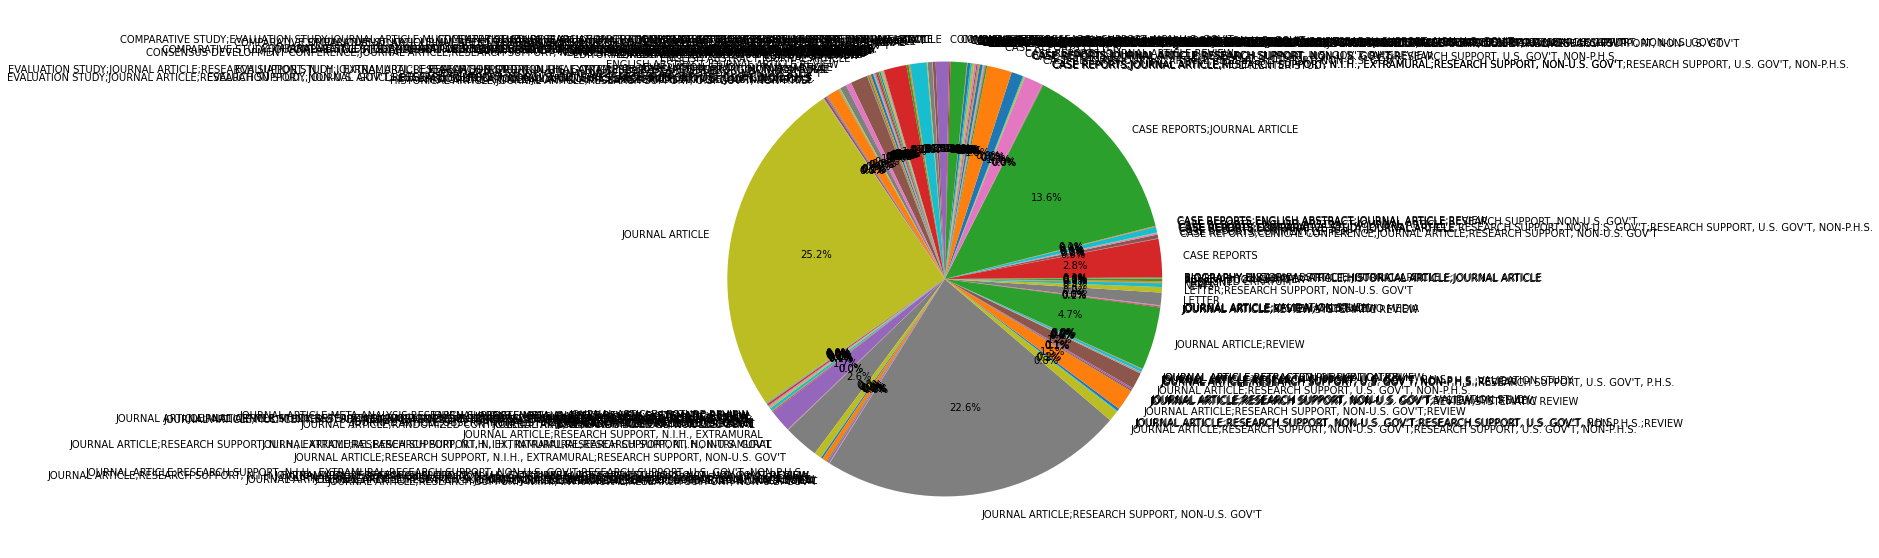

In [16]:
labels, frequencies = np.unique(df.DT.values, return_counts = True)
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
plt.pie(frequencies,labels = labels, autopct = '%1.1f%%')
plt.show()

In [17]:
print("Abstracts:","\n")
print(df.AB.values[:])

Abstracts: 

['BACKGROUND: ENDEMIC TO SOILS OF NORTHERN AUSTRALIA, BURKHOLDERIA PSEUDOMALLEI IS THE GRAM-NEGATIVE PATHOGEN RESPONSIBLE FOR MELIOIDOSIS, WHICH CAUSES A CLINICAL SPECTRUM RANGING FROM PNEUMONIA AND/OR CUTANEOUS INFECTION TO DISSEMINATED DISEASE WITH FULMINANT SEPTICAEMIA. INCIDENT CASES PEAK AFTER MONSOONAL RAINS, PARTICULARLY IN INDIVIDUALS WITH IMMUNE DYSFUNCTION. EARLY DIAGNOSIS OF MELIOIDOSIS IS CHALLENGING FOR CLINICIANS, GIVEN ITS ABILITY TO MIMIC MANY OTHER DISEASES AND HIGH CLINICAL (ASSOCIATED MORTALITY) IMPACT. OBJECTIVES: THE AIM OF THIS PAPER IS TO PROVIDE GENERAL PRACTITIONERS WITH AN OVERVIEW OF MELIOIDOSIS, COVERING EPIDEMIOLOGY, RISK FACTORS FOR INFECTION, CLINICAL DISEASE SPECTRUM, DIAGNOSTIC TECHNIQUES AND AN APPROACH TO MANAGEMENT, INCLUDING PUBLIC HEALTH ASPECTS. DISCUSSION: PRIMARY CARE PHYSICIANS PLAY A KEY ROLE IN EARLY DISEASE RECOGNITION, INITIAL PATIENT STABILISATION, REQUEST OF APPROPRIATE CLINICAL SAMPLES (PARTICULARLY BLOOD CULTURES) AND PROMP

In [18]:
## Remove punctuation from each text:
def lower_case(input_str):
    input_str = input_str.lower()
    return input_str

df['TI'] = df['TI'].apply(lambda x: re.sub('[^a-zA-z0-9\s]','',x))
df['TI'] = df['TI'].apply(lambda x: lower_case(x))

df['AB'] = df['AB'].apply(str)
df['AB'] = df['AB'].apply(lambda x: re.sub('[^a-zA-z0-9\s]','',x))
df['AB'] = df['AB'].apply(lambda x: lower_case(x))

In [19]:
df['AB'].head()

0    background endemic to soils of northern austra...
1    melioidosis caused by the facultative intracel...
2    melioidosis is an infectious disease caused by...
3    melioidosis is a tropical bacterial infection ...
4    melioidosis which is infection with the gramne...
Name: AB, dtype: object

In [20]:
text = df[["TI"]]
text.head()

,TI
0,melioidosis an updated review
1,melioidosis a neglected cause of communityacqu...
2,musculoskeletal melioidosis
3,a review of melioidosis cases imported into eu...
4,melioidosis


In [21]:
text_arr = text.stack().tolist()
len(text_arr)

3202

In [22]:
## Using Spacy module for Sentence Tokenization:
from tqdm import tqdm_notebook, tnrange
from tqdm.auto import tqdm
tqdm.pandas(desc='Progress')

sentences = []
for body in tqdm(text_arr):
    doc = nlp(body)
    for i in doc.sents:
        if len(i)>10:
            ## Taking those sentences only which have length more than 10
            sentences.append(i.string.strip())

print(len(sentences))

  0%|          | 0/3202 [00:00<?, ?it/s]

1755


In [23]:
## Creating Document Pool Embeddings using Stacked of PooledFlairEmbeddings('pubmed-forward'), PooledFlairEmbeddings('pubmed-backward') 
document_embeddings = DocumentPoolEmbeddings([PooledFlairEmbeddings('pubmed-forward'),
                                             PooledFlairEmbeddings('pubmed-backward')],
                                             pooling='min')

2021-11-25 02:04:42,861 https://flair.informatik.hu-berlin.de/resources/embeddings/flair/pubmed-forward.pt not found in cache, downloading to /tmp/tmp1zq864w3


100%|██████████| 72819144/72819144 [00:03<00:00, 22648466.78B/s]

2021-11-25 02:04:46,426 copying /tmp/tmp1zq864w3 to cache at /root/.flair/embeddings/pubmed-forward.pt


2021-11-25 02:04:46,571 removing temp file /tmp/tmp1zq864w3
2021-11-25 02:04:47,436 https://flair.informatik.hu-berlin.de/resources/embeddings/flair/pubmed-backward.pt not found in cache, downloading to /tmp/tmpuvf5tro4


100%|██████████| 72819144/72819144 [00:03<00:00, 22840520.06B/s]

2021-11-25 02:04:50,970 copying /tmp/tmpuvf5tro4 to cache at /root/.flair/embeddings/pubmed-backward.pt


2021-11-25 02:04:51,114 removing temp file /tmp/tmpuvf5tro4


In [24]:
## Getting sentence embeddings for each sentence and storing those into flair_elmo_ls:
flair_elmo_ls = []

for _sent in tqdm(sentences):
    example = Sentence(_sent)
    document_embeddings.embed(example)
    flair_elmo_ls.append(example.get_embedding())

  0%|          | 0/1755 [00:00<?, ?it/s]

In [25]:
## Converting embeddings into numpy array :
flair_elmo_arr = [emb.cpu().detach().numpy() for emb in flair_elmo_ls]

In [26]:
tsne = TSNE(verbose=1, perplexity=5)
X_embedded = tsne.fit_transform(flair_elmo_arr)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 1755 samples in 0.014s...
[t-SNE] Computed neighbors for 1755 samples in 1.403s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1755
[t-SNE] Computed conditional probabilities for sample 1755 / 1755
[t-SNE] Mean sigma: 1.611764
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.213593
[t-SNE] KL divergence after 1000 iterations: 1.176326


In [27]:
from sklearn.cluster import MiniBatchKMeans

k = 20
kmeans = MiniBatchKMeans(n_clusters=k)
y_pred = kmeans.fit_predict(flair_elmo_arr)
y = y_pred

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


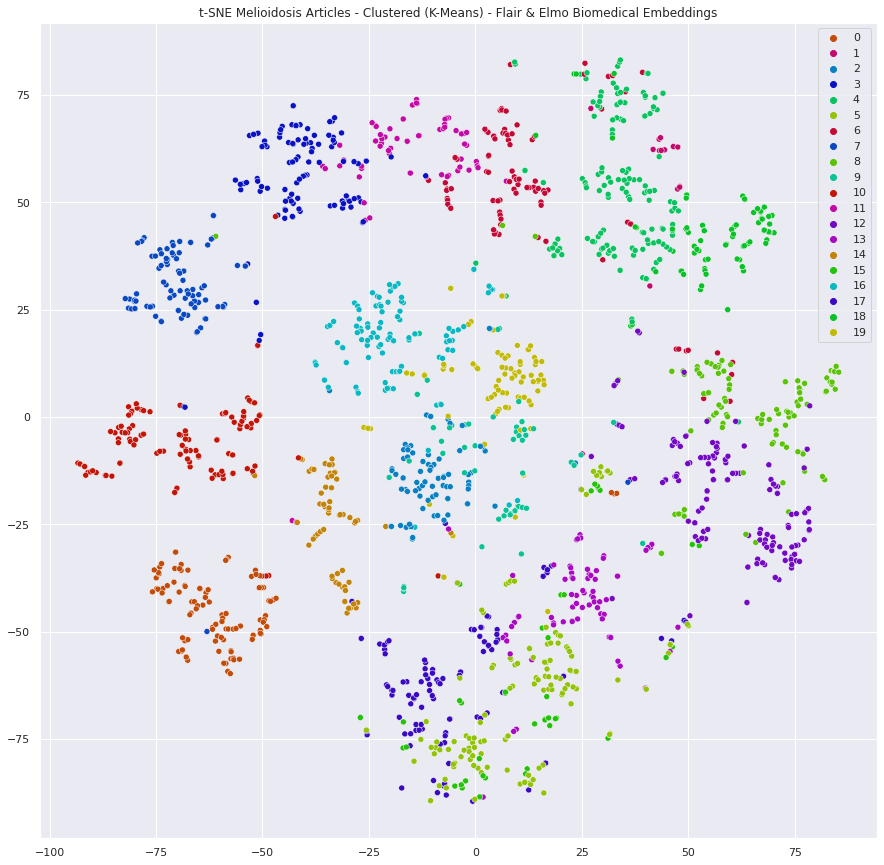

In [28]:
from matplotlib import pyplot as plt
import seaborn as sns
import random 

# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# let's shuffle the list so distinct colors stay next to each other
palette = sns.hls_palette(20, l=.4, s=.9)
random.shuffle(palette)

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y, legend='full', palette=palette)
plt.title("t-SNE Melioidosis Articles - Clustered (K-Means) - Flair & Elmo Biomedical Embeddings")
plt.show()

In [29]:
## IPython Utilities
from IPython.display import HTML

import notebook as widgets
from ipywidgets import interact, interactive, fixed, interact_manual, interactive_output, VBox

from IPython.html import widgets
from IPython.display import display, Image, HTML, Markdown, clear_output

def printmd(string):
    display(Markdown(string))

/usr/local/lib/python3.7/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [30]:
def get_similarity(search_string, results_returned = 3):
    example_text = Sentence(search_string)
    document_embeddings.embed(example_text)
    search_vect = example_text.get_embedding()
    search_vect = search_vect.cpu().detach().numpy()
    cosine_similarities = pd.Series(cosine_similarity([search_vect], flair_elmo_arr).flatten())
    output =""
    for i,j in cosine_similarities.nlargest(int(results_returned)).iteritems():
        output +='<p style="font-family:verdana; font-size:110%;"> '
        for i in sentences[i].split():
            if i.lower() in search_string:
                output += " <b>"+str(i)+"</b>"
            else:
                output += " "+str(i)
        output += "</p><hr>"

    output = '<h3>Results:</h3>'+output
    display(HTML(output))

text = widgets.Text(
    value='Thailand',
    placeholder='Paste ticket description here!',
    description='Query:',
    disabled=False,
    layout=widgets.Layout(width='50%', height='50px')
)

out = widgets.Output()

def callback(_):
    with out:
        clear_output()
        # what happens when we press the button
        printmd("**<font color=orange> -------------------------------------------------------------------------------------------------------- </font>**")        
        printmd(f"**<font color=blue>Semantic Search has Started </font>**")
        get_similarity(text.value)
        printmd("**<font color=orange> -------------------------------------------------------------------------------------------------------- </font>**")        

text.on_submit(callback)
# displaying button and its output together
widgets.VBox([text, out])